<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller/Taller_Sem10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Valoración de Riesgo de Hipertensión Modelo ML**

El dataset fue sacado de Kaggle el cual tiene el nombre de
[Hypertension Risk Prediction Dataset](https://www.kaggle.com/datasets/ankushpanday1/hypertension-risk-prediction-dataset/datahttps://)

##Realizamos el preprocesamiento de las columnas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar dataset
df = pd.read_csv("hypertension_dataset.csv")

# Columnas seleccionadas
cols = ['Gender', 'Age', 'BMI', 'Physical_Activity_Level', 'Sleep_Duration',
        'Smoking_Status', 'Family_History', 'Stress_Level', 'Hypertension',
        'Salt_Intake', 'Alcohol_Intake']
df = df[cols].copy()

# Mapeo de variables categóricas
df['Hypertension'] = df['Hypertension'].map({'Low': 0, 'High': 1})
df['Family_History'] = df['Family_History'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({'Low': 2, 'Moderate': 1, 'High': 0})
df['Smoking_Status'] = df['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})

# Separar variables y objetivo
X = df.drop("Hypertension", axis=1)
y = df["Hypertension"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Entrenamiento con SVM

### Kernel Lineal

In [ ]:
# Entrenar modelo SVM simple
svm_linear = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predicciones
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluación del modelo
print("============ KERNEL LINEAL ============")
print("\n=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, y_pred_linear))

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_linear))

print("\n=== EXACTITUD ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

============ KERNEL LINEAL ============

=== MATRIZ DE CONFUSIÓN ===
[[ 4841  4999]
 [12538 12619]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.28      0.49      0.36      9840
           1       0.72      0.50      0.59     25157

    accuracy                           0.50     34997
   macro avg       0.50      0.50      0.47     34997
weighted avg       0.59      0.50      0.52     34997


=== EXACTITUD ===
Accuracy: 0.4988999057062034


### Kernel Radial/Gaussiano

In [ ]:
from sklearn.svm import SVC

# Crear el modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)

# Entrenar el modelo con datos escalados
svm_rbf.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba escalado
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluación
print("============ KERNEL RADIAL ============")
print("\n=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, y_pred_rbf))

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_rbf))

print("\n=== EXACTITUD ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

============ KERNEL RADIAL ============

=== MATRIZ DE CONFUSIÓN ===
[[ 4709  5131]
 [12029 13128]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.28      0.48      0.35      9840
           1       0.72      0.52      0.60     25157

    accuracy                           0.51     34997
   macro avg       0.50      0.50      0.48     34997
weighted avg       0.60      0.51      0.53     34997


=== EXACTITUD ===
Accuracy: 0.5096722576220819


### Kernel Polinomial

In [ ]:
# Crear modelo SVM con kernel polinomial
svm_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale', class_weight='balanced', random_state=42)

# Entrenar con datos escalados
svm_poly.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba escalado
y_pred_poly = svm_poly.predict(X_test_scaled)

# Evaluación
print("============ KERNEL POLINOMIAL ============")
print("\n=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, y_pred_poly))

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_poly))

print("\n=== EXACTITUD ===")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

============ KERNEL POLINOMIAL ============

=== MATRIZ DE CONFUSIÓN ===
[[ 4898  4942]
 [12460 12697]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.28      0.50      0.36      9840
           1       0.72      0.50      0.59     25157

    accuracy                           0.50     34997
   macro avg       0.50      0.50      0.48     34997
weighted avg       0.60      0.50      0.53     34997


=== EXACTITUD ===
Accuracy: 0.5027573792039318


### Resultados

📊 Métricas comparadas:


,Accuracy,Precision,Recall,F1-Score
Lineal,0.498900,0.593189,0.498900,0.524137
Radial/Gaussiano,0.509672,0.595935,0.509672,0.534350
Polinomial,0.502757,0.596773,0.502757,0.527805


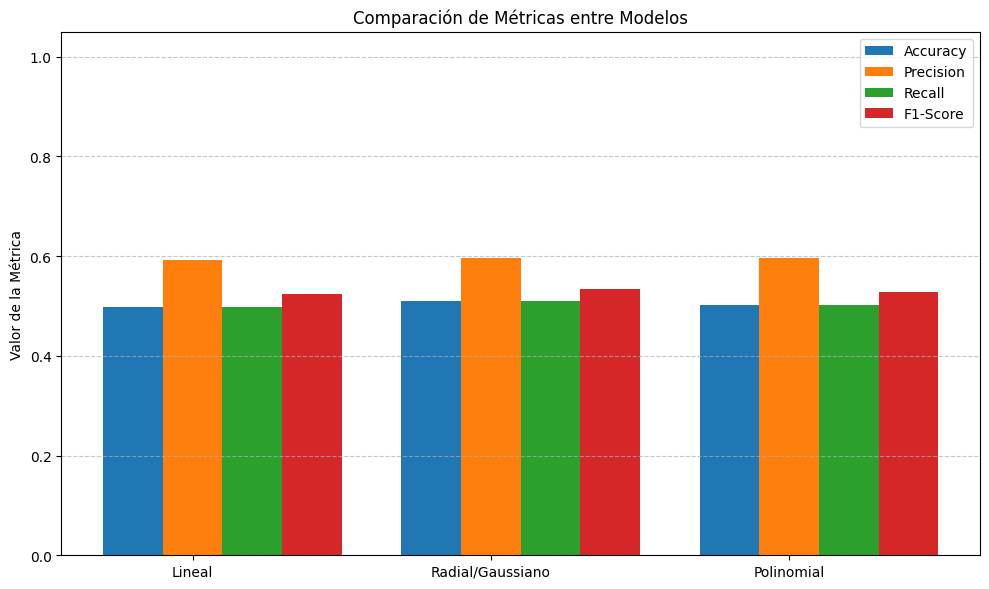

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calcular métricas para cada modelo
metricas = {
    "Lineal": {
        "Accuracy": accuracy_score(y_test, y_pred_linear),
        "Precision": precision_score(y_test, y_pred_linear, average='weighted'),
        "Recall": recall_score(y_test, y_pred_linear, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_linear, average='weighted')
    },
    "Radial/Gaussiano": {
        "Accuracy": accuracy_score(y_test, y_pred_rbf),
        "Precision": precision_score(y_test, y_pred_rbf, average='weighted'),
        "Recall": recall_score(y_test, y_pred_rbf, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_rbf, average='weighted')
    },
    "Polinomial": {
        "Accuracy": accuracy_score(y_test, y_pred_poly),
        "Precision": precision_score(y_test, y_pred_poly, average='weighted'),
        "Recall": recall_score(y_test, y_pred_poly, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_poly, average='weighted')
    }
}

# Crear DataFrame
df_metricas = pd.DataFrame(metricas).T

# Mostramos las métricas
print("📊 Métricas comparadas:")
display(df_metricas)

# Creamos el gráfico de barras agrupadas
labels = df_metricas.index
metricas_names = df_metricas.columns
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
for i, metrica in enumerate(metricas_names):
    plt.bar(x + i * width, df_metricas[metrica], width=width, label=metrica)

plt.xticks(x + width, labels)
plt.ylim(0, 1.05)
plt.ylabel("Valor de la Métrica")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

============ KERNEL RADIAL ============

=== MATRIZ DE CONFUSIÓN ===
[[ 4697  5143]
 [11788 13369]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.28      0.48      0.36      9840
           1       0.72      0.53      0.61     25157

    accuracy                           0.52     34997
   macro avg       0.50      0.50      0.48     34997
weighted avg       0.60      0.52      0.54     34997


=== EXACTITUD ===
Accuracy: 0.5162156756293397


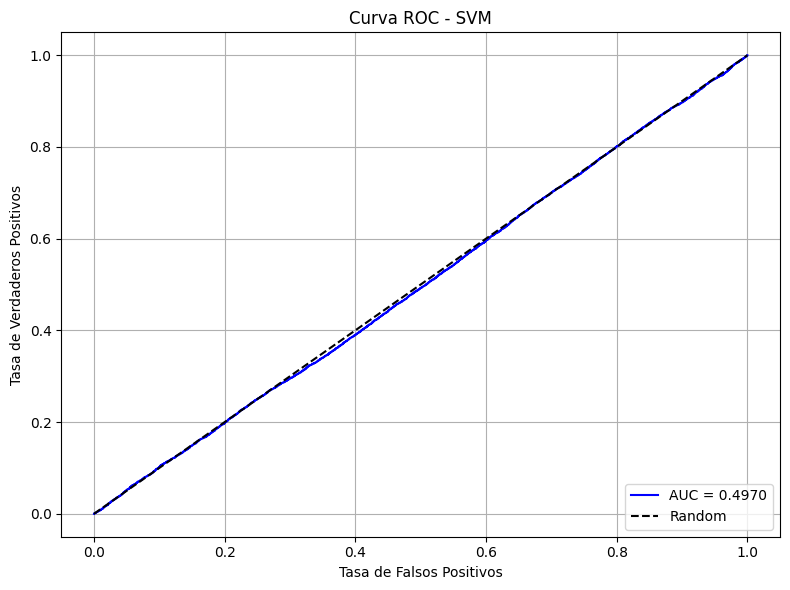

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# =============================
# 1. Funciones de Discretización
# =============================

def bin_alcohol(x):
    if x == 0:
        return 'None'
    elif x <= 10:
        return 'Low'
    elif x <= 20:
        return 'Moderate'
    else:
        return 'High'

def bin_salt(x):
    if x < 5:
        return 'Low'
    elif x <= 10:
        return 'Moderate'
    else:
        return 'High'

# =============================
# 2. Cargar Dataset
# =============================

df = pd.read_csv("hypertension_dataset.csv")

# Columnas seleccionadas
cols = ['Gender', 'Age', 'BMI', 'Physical_Activity_Level', 'Sleep_Duration',
        'Smoking_Status', 'Family_History', 'Stress_Level', 'Hypertension',
        'Salt_Intake', 'Alcohol_Intake']
df = df[cols].copy()

# =============================
# 3. Aplicar Discretización
# =============================

df['Alcohol_Intake'] = df['Alcohol_Intake'].apply(bin_alcohol)
df['Salt_Intake'] = df['Salt_Intake'].apply(bin_salt)

# =============================
# 4. Mapeo de Variables Categóricas
# =============================

df['Hypertension'] = df['Hypertension'].map({'Low': 0, 'High': 1})
df['Family_History'] = df['Family_History'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({'Low': 2, 'Moderate': 1, 'High': 0})
df['Smoking_Status'] = df['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
df['Alcohol_Intake'] = df['Alcohol_Intake'].map({'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3})
df['Salt_Intake'] = df['Salt_Intake'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# =============================
# 5. Separar Variables y Objetivo
# =============================

X = df.drop("Hypertension", axis=1)
y = df["Hypertension"]

# =============================
# 6. Dividir en Train/Test
# =============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# =============================
# 7. Escalar Datos Numéricos
# =============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 8. Crear y Entrenar el Modelo SVM con probability=True
# =============================

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# =============================
# 9. Predicción y Evaluación
# =============================

y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_probs = svm_rbf.predict_proba(X_test_scaled)[:, 1]

print("============ KERNEL RADIAL ============")
print("\n=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, y_pred_rbf))

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_rbf))

print("\n=== EXACTITUD ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

# =============================
# 10. Curva ROC y AUC
# =============================

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# Crear un Pipeline que incluye el scaler y el modelo SVM
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', probability=True, random_state=42))
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Exportar el pipeline completo con compresión máxima
joblib.dump(pipeline, 'SVM.pkl', compress=9)

print("✅ Modelo exportado")



✅ Modelo exportado
